# Look at the positions of players when punts are recieved

In [64]:
import pandas as pd
import glob
from tqdm import tqdm
import numpy as np

In [33]:
import sys
sys.path.insert(0,'../scripts/')

from football_field import create_football_field

## Faircatch Positions

In [34]:
fc = pd.read_parquet('../working/position_at_faircatch.parquet')

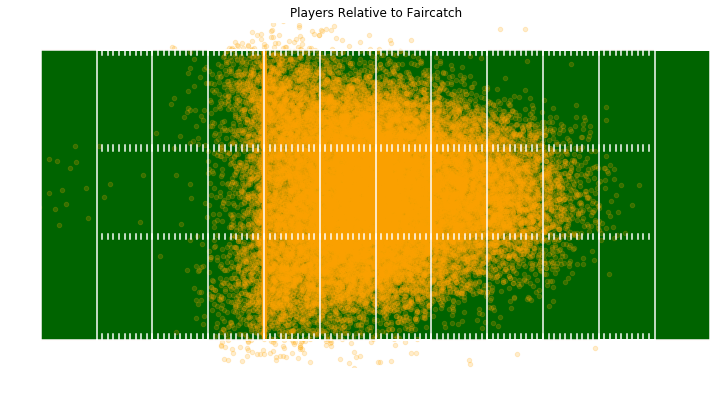

In [59]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.plot(x='x_rel_left_to_right_plus40', y='y', kind='scatter',ax=ax, alpha=0.2, title='Players Relative to Faircatch', color='orange')

## Punt Recieved Positions

In [46]:
prec = pd.read_parquet('../working/position_at_punt_recieved.parquet')

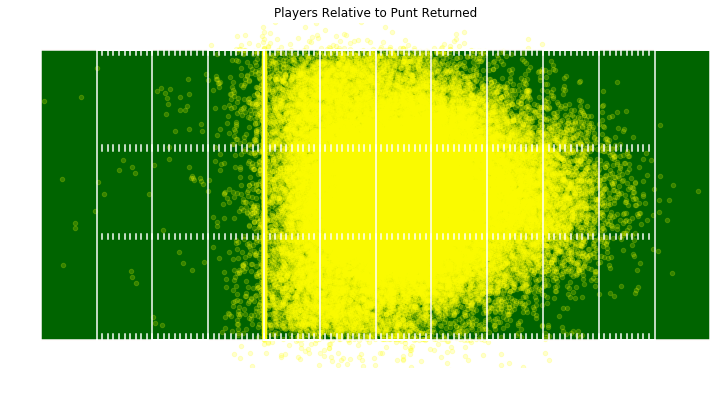

In [61]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec.plot(x='x_rel_left_to_right_plus40', y='y', kind='scatter',ax=ax, alpha=0.2, title='Players Relative to Punt Returned', color='yellow')

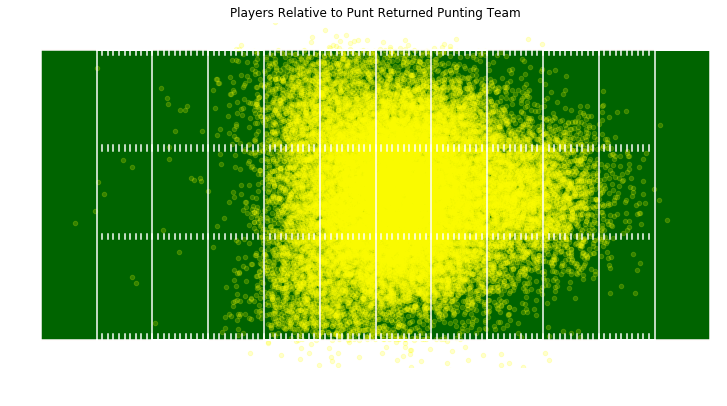

In [60]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec.loc[prec['punting_returning_team'] == 'Punting_Team'] \
    .plot(x='x_rel_left_to_right_plus40', y='y', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow')

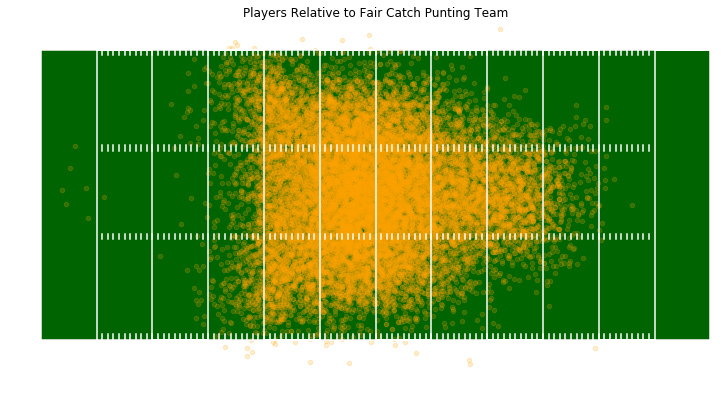

In [58]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.loc[fc['punting_returning_team'] == 'Punting_Team'] \
    .plot(x='x_rel_left_to_right_plus40', y='y', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Fair Catch Punting Team', color='orange')

In [68]:
fc['distance_from_rec'] = np.sqrt(np.square(fc['x_rel']) + np.square(fc['y_rel']))
prec['distance_from_rec'] = np.sqrt(np.square(prec['x_rel']) + np.square(prec['y_rel']))

# Distance of Punting Team from Returner Fair Catch vs Returned

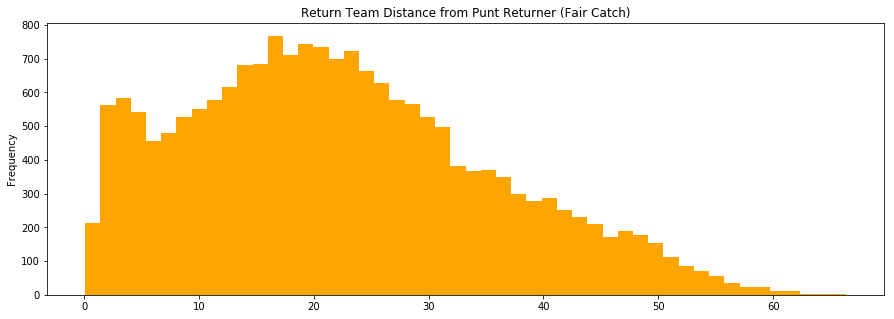

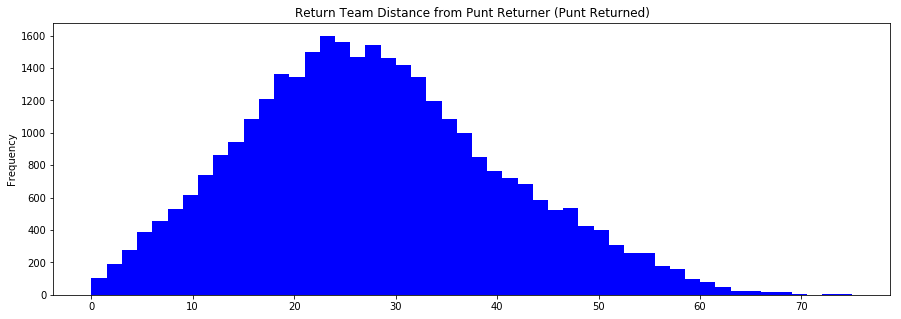

In [98]:
fc.loc[fc['punting_returning_team'] == 'Punting_Team']['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Return Team Distance from Punt Returner (Fair Catch)', color='orange')
plt.show()

prec.loc[prec['punting_returning_team'] == 'Punting_Team']['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Return Team Distance from Punt Returner (Punt Returned)', color='blue')
plt.show()

# Closest Player to Returner

In [89]:
fc_closest_player = fc.loc[fc['punting_returning_team'] == 'Punting_Team'].groupby(['season_year', 'gamekey', 'playid'])[['role','distance_from_rec']].min().reset_index()
prec_closest_player = prec.loc[prec['punting_returning_team'] == 'Punting_Team'].groupby(['season_year', 'gamekey', 'playid'])[['role','distance_from_rec']].min().reset_index()

In [90]:
fc_closest_player.groupby('role').count()

,season_year,gamekey,playid,distance_from_rec
role,,,,
GL,1661,1661,1661,1661
GLi,6,6,6,6
GR,5,5,5,5
GRi,1,1,1,1


In [94]:
prec_closest_player.groupby('role').count()

,season_year,gamekey,playid,distance_from_rec
role,,,,
GL,2879,2879,2879,2879
GLi,8,8,8,8
GR,19,19,19,19
GRi,8,8,8,8
P,5,5,5,5


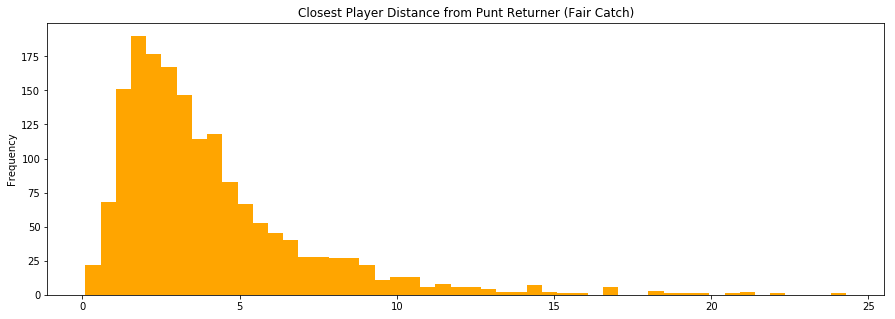

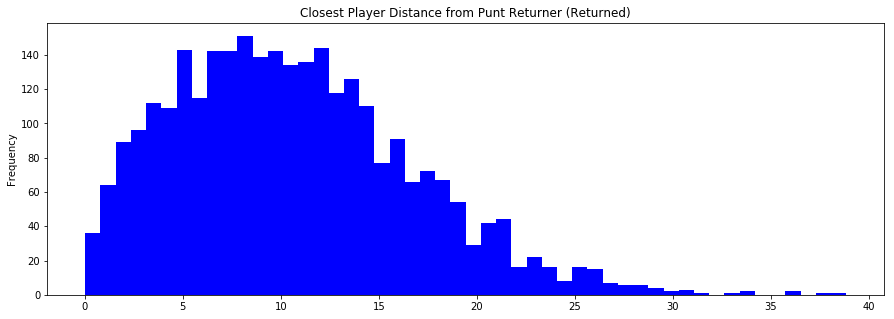

In [102]:
fc_closest_player['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Closest Player Distance from Punt Returner (Fair Catch)', color='orange')
plt.show()
prec_closest_player['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Closest Player Distance from Punt Returner (Returned)', color='blue')

## All Gunner's Distance from Returner

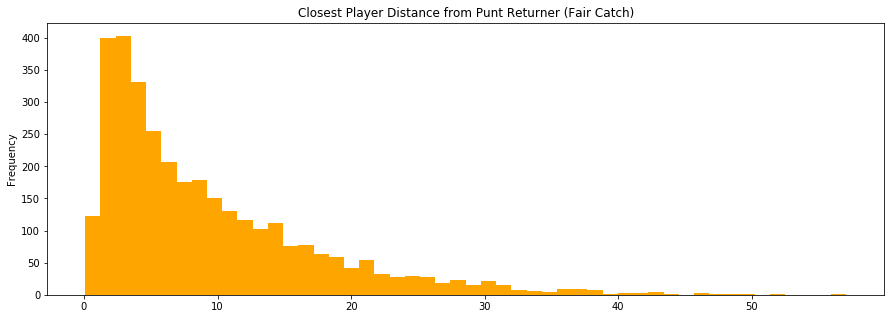

In [104]:
fc.loc[fc['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Closest Player Distance from Punt Returner (Fair Catch)', color='orange')
plt.show()

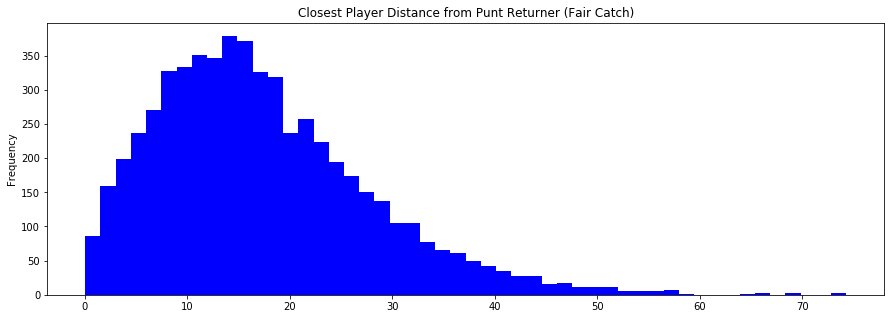

In [123]:
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Closest Player Distance from Punt Returner (Fair Catch)', color='blue')
plt.show()

In [122]:
fc.loc[fc['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'].mean()

9.27793658080118

In [126]:
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'].mean()

17.314709779415214

# Plot Gunner Positions On Punt Returns/ Fair Catch

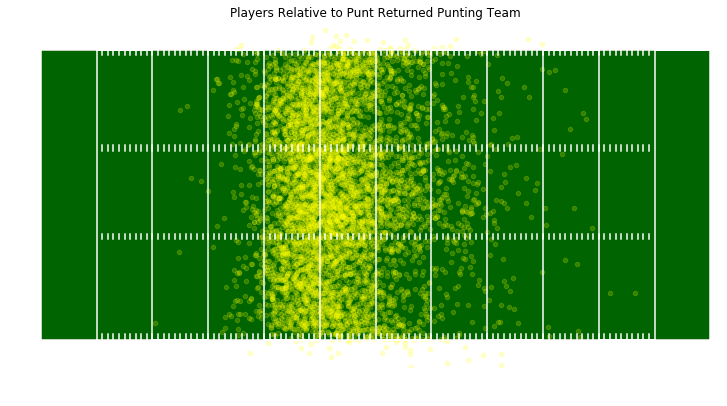

In [110]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow')

# Gunner Positions Relative to Punt Returner

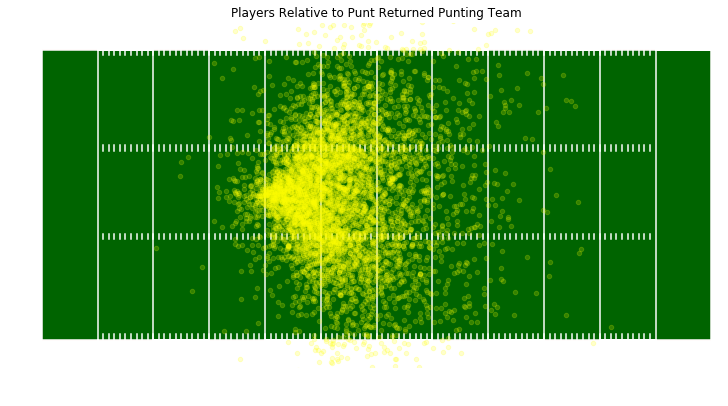

In [142]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec['y_rel_plus26'] = prec['y_rel'] + 26.65

prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow', zorder=3)

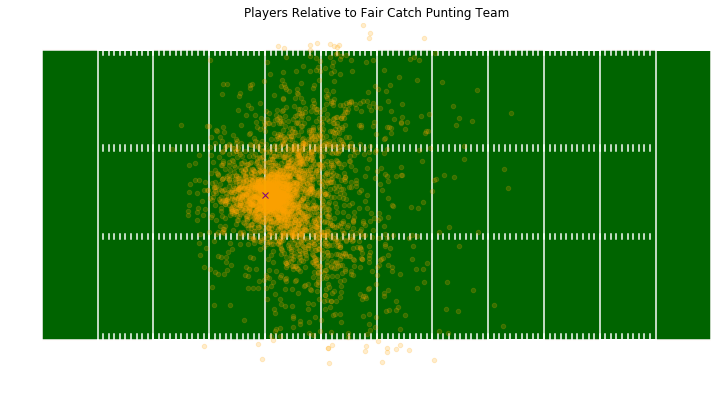

In [154]:
fig, ax = create_football_field(endzones=False, linenumbers=False)

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc['y_rel_plus26'] = fc['y_rel'] + 26.65

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.loc[fc['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Fair Catch Punting Team', color='orange', zorder=3)
plt.plot(40, 26.65, 'x', color='purple', zorder=5)
plt.show()

# Position of Gunners on Injury Plays

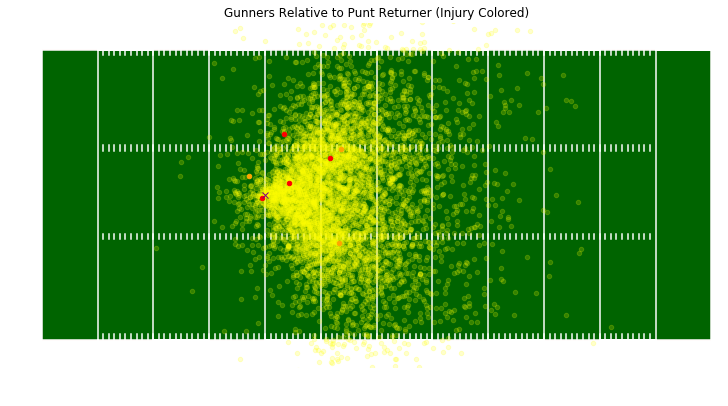

In [155]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec['y_rel_plus26'] = prec['y_rel'] + 26.65

prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow', zorder=3)
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi']) & prec['injured_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Players Relative to Punt Returned Punting Team', color='red', zorder=3)
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi']) & prec['primary_partner_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Gunners Relative to Punt Returner (Injury Colored)', color='orange', zorder=3)
plt.plot(40, 26.65, 'x', color='purple', zorder=5)
plt.show()